# Mini Project

#### Import all the important libraries and models

In [47]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


In [48]:
obese = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [66]:
obese["BMI"]=obese["Weight"]/(obese["Height"]*obese["Height"])
obese

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II,36.587084
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,17.099278
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II,31.889841
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II,28.899693


### Model

In [72]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

def encode_columns(df):
    label_encoders = {}
    for column in ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
    
    df = pd.get_dummies(df, columns=['CAEC', 'CALC', 'MTRANS'])
    return df, label_encoders

train_encoded, le_train = encode_columns(obese.copy())
test_encoded, le_test = encode_columns(test_data.copy())

train_encoded.head(), test_encoded.head()


(   id  Gender        Age    Height      Weight  \
 0   0       1  24.443011  1.699998   81.669950   
 1   1       0  18.000000  1.560000   57.000000   
 2   2       0  18.000000  1.711460   50.165754   
 3   3       0  20.952737  1.710730  131.274851   
 4   4       1  31.641081  1.914186   93.798055   
 
    family_history_with_overweight  FAVC      FCVC       NCP  SMOKE  ...  \
 0                               1     1  2.000000  2.983297      0  ...   
 1                               1     1  2.000000  3.000000      0  ...   
 2                               1     1  1.880534  1.411685      0  ...   
 3                               1     1  3.000000  3.000000      0  ...   
 4                               1     1  2.679664  1.971472      0  ...   
 
    CAEC_Sometimes  CAEC_no  CALC_Frequently  CALC_Sometimes CALC_no  \
 0               1        0                0               1       0   
 1               0        0                0               0       1   
 2               1

Accuracy: 0.8386319845857418


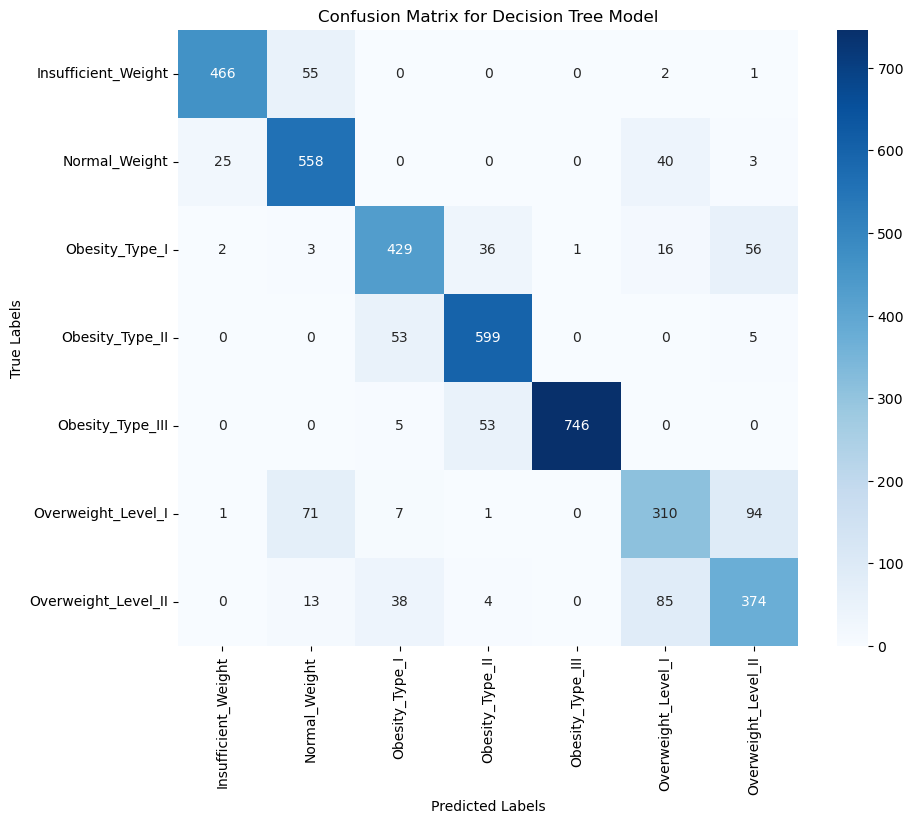

                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.89      0.92       524
      Normal_Weight       0.80      0.89      0.84       626
     Obesity_Type_I       0.81      0.79      0.80       543
    Obesity_Type_II       0.86      0.91      0.89       657
   Obesity_Type_III       1.00      0.93      0.96       804
 Overweight_Level_I       0.68      0.64      0.66       484
Overweight_Level_II       0.70      0.73      0.71       514

           accuracy                           0.84      4152
          macro avg       0.83      0.83      0.83      4152
       weighted avg       0.84      0.84      0.84      4152



In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)

dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_val)

accuracy_dt = accuracy_score(y_val, y_pred_dt)
print("Accuracy:", accuracy_dt)

cm_dt = confusion_matrix(y_val, y_pred_dt, labels=dt_classifier.classes_)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=dt_classifier.classes_, yticklabels=dt_classifier.classes_)
plt.title('Confusion Matrix for Decision Tree Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print(classification_report(y_val, y_pred_dt))


In [73]:
X = train_encoded.drop(['id', 'NObeyesdad'], axis=1)

y = train_encoded['NObeyesdad']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape


((16606, 26), (4152, 26), (16606,), (4152,))

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

accuracy


0.899325626204239

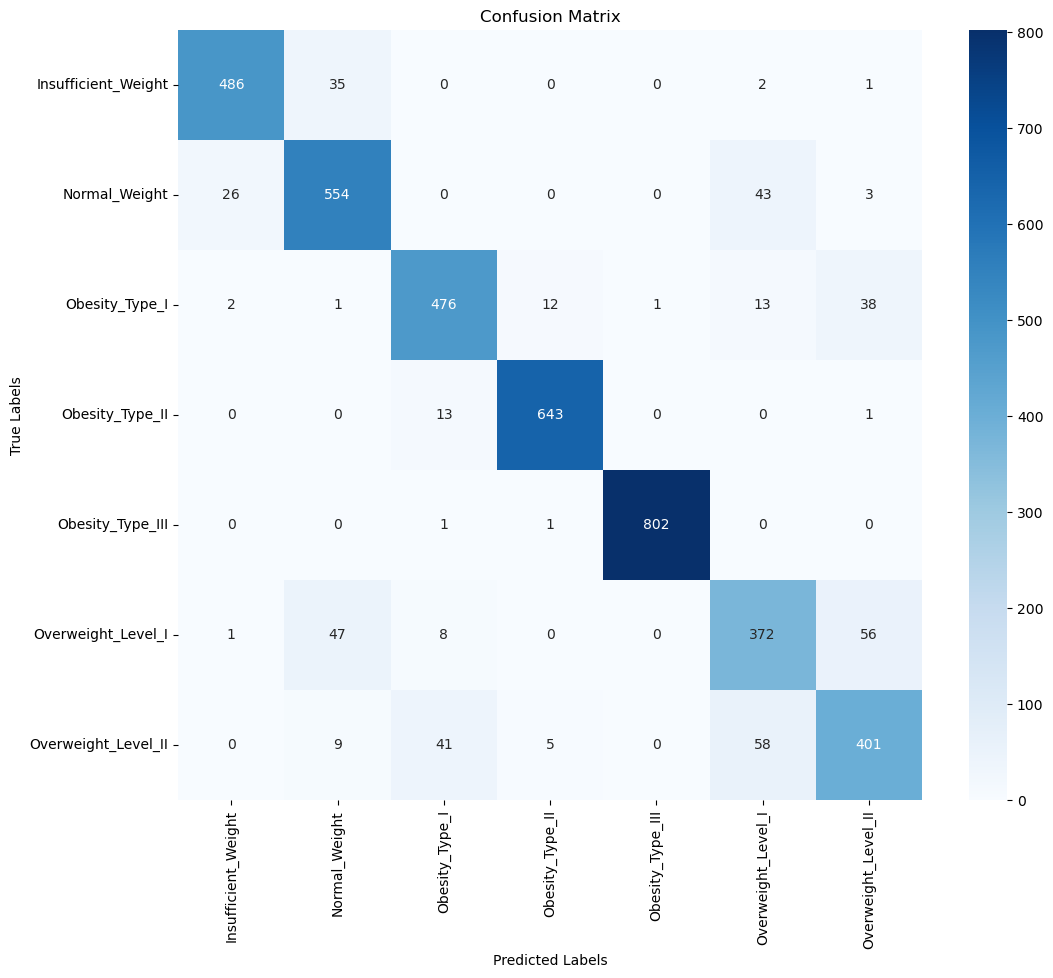

In [98]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_val, y_pred, labels=rf_classifier.classes_)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [77]:
from sklearn.model_selection import cross_val_score

rf_classifier_cv = RandomForestClassifier(n_estimators=100, random_state=42)

cv_scores = cross_val_score(rf_classifier_cv, X_train, y_train, cv=5, scoring='accuracy')

cv_scores.mean(), cv_scores.std()


(0.8997957826256971, 0.007857227412112621)

The 5-fold cross-validation for the Random Forest model yielded an average accuracy of about 89.97% with a standard deviation of 0.78%. This indicates that the model performs consistently across different subsets of the training data, with relatively low variance in its accuracy.



These results suggest that the Random Forest classifier is quite stable and reliable for this prediction task

In [95]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)

xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=100)

xgb_cv_scores_reduced = cross_val_score(xgb_classifier, X_train, y_train_encoded, cv=5, scoring='accuracy', n_jobs=-1)

xgb_classifier.fit(X_train, y_train_encoded)

y_pred_xgb_encoded = xgb_classifier.predict(X_val)
y_pred_xgb = le.inverse_transform(y_pred_xgb_encoded)  

accuracy_xgb_reduced = accuracy_score(y_val, y_pred_xgb)
classification_rep_xgb_reduced = classification_report(y_val, y_pred_xgb)

xgb_cv_scores_reduced.mean(), xgb_cv_scores_reduced.std(), accuracy_xgb_reduced


(0.9040110358960302, 0.006443857943949225, 0.9072736030828517)

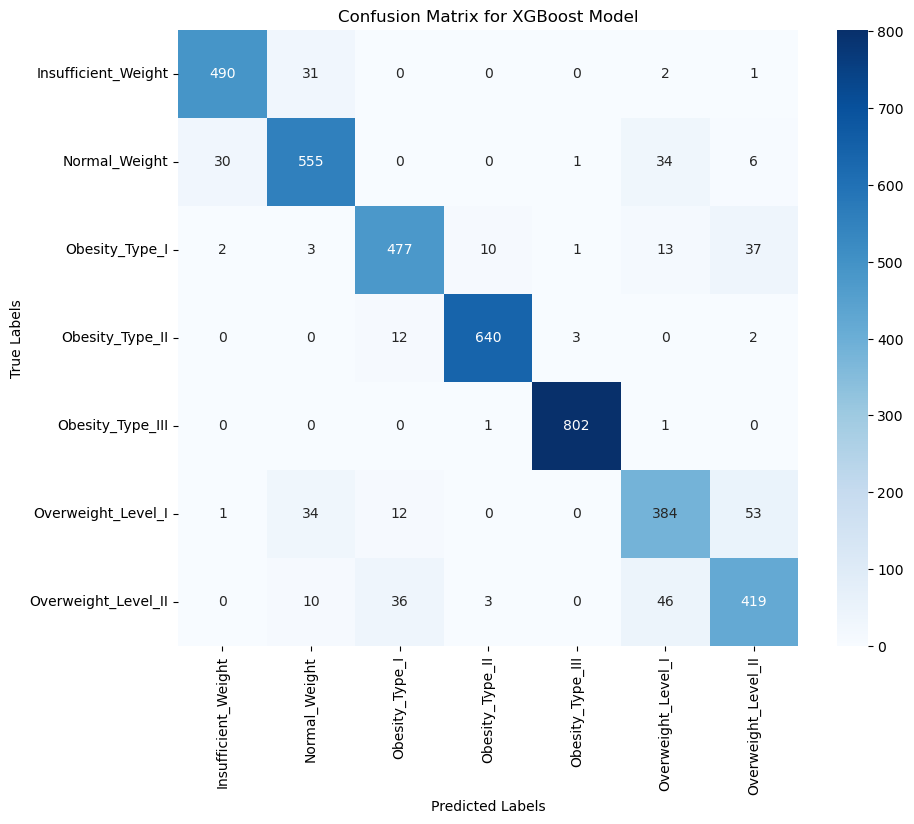

In [96]:
# Compute the confusion matrix for the XGBoost model predictions
cm_xgb_reduced = confusion_matrix(y_val, y_pred_xgb, labels=le.classes_)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_xgb_reduced, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix for XGBoost Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### Outcomes

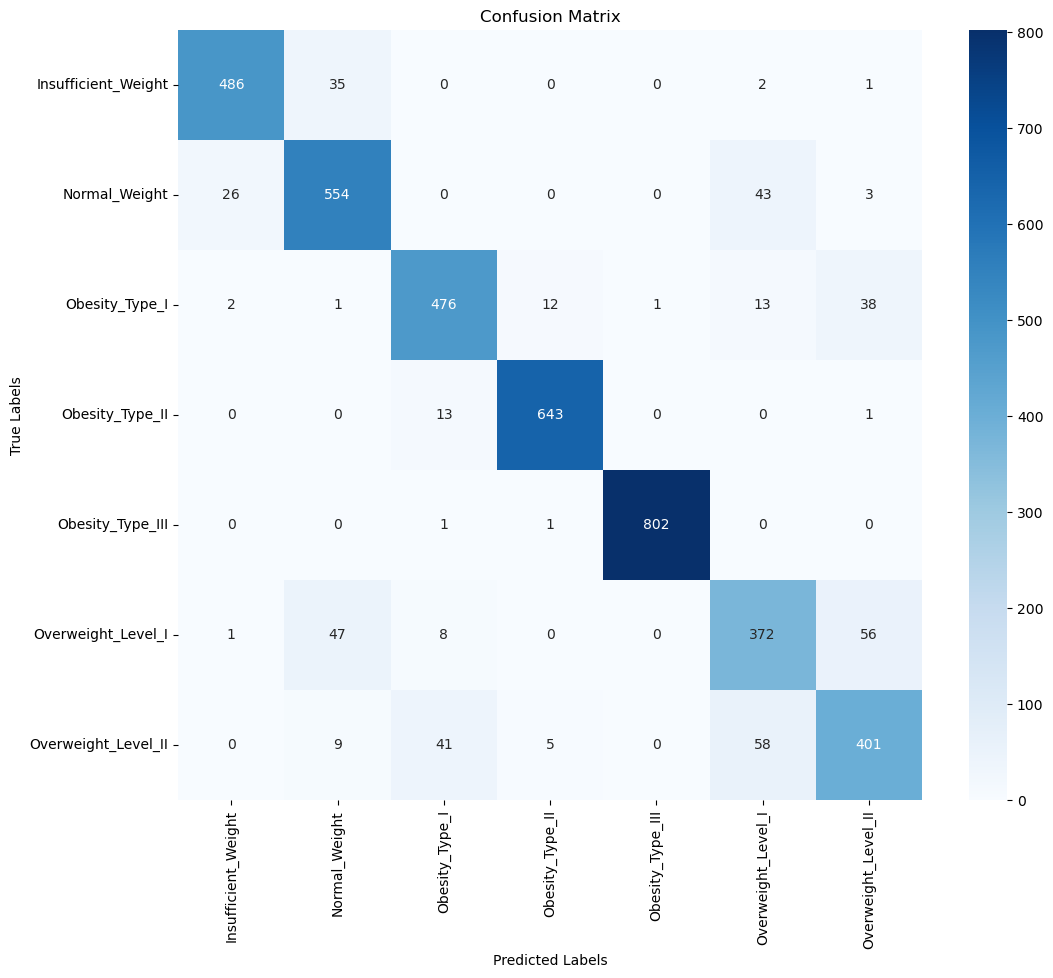

In [97]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_val, y_pred, labels=rf_classifier.classes_)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### Outcomes

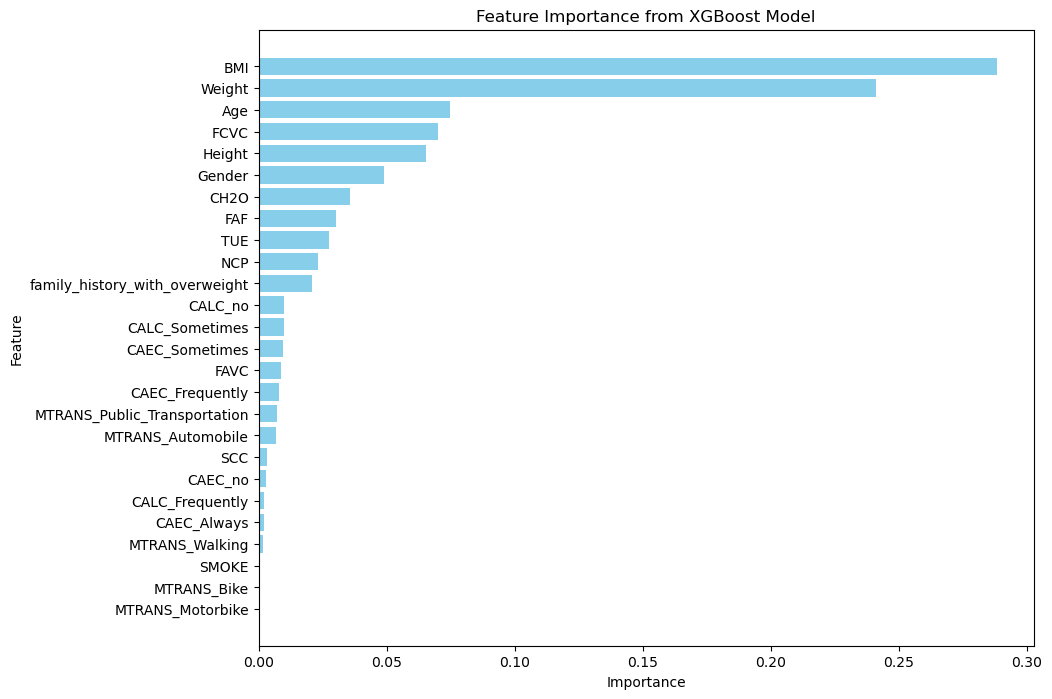

In [102]:
import matplotlib.pyplot as plt

# Extract feature importances from the model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to visualize the importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from XGBoost Model')
plt.gca().invert_yaxis()
plt.show()
